## Problem Statement

One of the prestigious telecom company maintains a database of the customer and their details. Based on this dataset the requirememt is to create the classification model using Naive Bayes to predict if the customer will churn or not. There are around 7000+ records using this we need to create the model after breaking the data into test and train.

**Data Dictionary**

**CustomerID** - Unique Customer ID

**Gender** - Gender of the customer

**SeniorCitizen** - Whether a customer can be classified as a senior citizen

**Partner** - If a customer is married/ in a live-in relationship

**Dependents** - If a customer has dependents (children/ retired parents)

**Tenure** - The time for which a customer has been using the service

**PhoneService** - Whether a customer has a landline phone service along with the internet service

**MultipleLines** - Whether a customer has multiple lines of internet connectivity

**InternetService** - The type of internet services chosen by the customer

**OnlineSecurity** - Specifies if a customer has online security

**OnlineBackup** - Specifies if a customer has online backup

**DeviceProtection** -	Specifies if a customer has opted for device protection

**TechSupport** - Whether a customer has opted for tech support of not

**StreamingTV** - Whether a customer has an option of TV streaming

**StreamingMovies** - Whether a customer has an option of Movie streaming

**Contract** - The type of contract a customer has chosen

**PaperlessBilling** - Whether a customer has opted for paperless billing

**PaymentMethod** -	Specifies the method by which bills are paid

**MonthlyCharges** - Specifies the money paid by a customer each month

**TotalCharges** - The total money paid by the customer to the company

**Churn** -	This is the target variable which specifies if a customer has churned or not


# Table of Content

1. **[Import Libraries](#lib)**
2. **[Data Preparation](#prep)**
    - 2.1 - **[Understand the Data](#read)**
    - 2.2 - **[Exploratory Data Analysis](#eda)**
    - 2.3 - **[Missing Value Treatment](#null)**
    - 2.4 - **[Encoding and Feature Scaling](#enc)**
3. **[What is Naive Bayes](#lr)**
    - 3.1 - **[Understanding Naive Bayes with an Example](#gi)**
    - 3.2 - **[Understanding Likelihoods and Priors](#mf)**
    - 3.3 - **[How to calculate the probability of new point](#sf)**
    - 3.4 - **[Laplace Smoothing and its benefits](#wknn)**
4. **[Splitting the data into Train and Test](#sd)**
5. **[Creating the model on training dataset](#model)**
6. **[Run the model on the Test Dataset](#test)**
7. **[Check the accuracy of the model](#acc)**
    - 7.1 - **[Accuracy Score](#accscore)**
    - 7.2 - **[Confusion Matrix](#cm)**
    - 7.3 - **[ROC Curve](#roc)**
    - 7.4 - **[F1 Score](#f1score)**
    - 7.5 - **[Log Loss](#logloss)**
8. **[Comparing the Training and Testing Accuracies](#overunder)**
9. **[Applying K-Fold Cross Validation to find the best value of Laplace Smoothing](#kfcv)**

<a id="lib"></a>
# 1. Import Libraries

In [309]:
#Importing the libraries which will be helpful for the data analysis. 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import os 

<a id="prep"></a>
# 2. Data Preparation

In [310]:
#Importing the dataset which we will use for the modelling 
os.chdir(r'E:\The Scholar\Assignments\Machine Learning\Assignment 6')
dataset = pd.read_csv('case_Study_nb.csv')

<a id="read"></a>
# 2.1. Understand the Data

In [311]:
#Here are the few commands which will help us to understand the basic data 
#The info command will help us to understand the different columns present in the dataset and its datatype
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   float64
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  MultipleLines     7043 non-null   object 
 13  InternetService   7043 non-null   object 
 14  OnlineSecurity    7043 non-null   object 
 15  OnlineBackup      7043 non-null   object 
 16  DeviceProtection  7043 non-null   object 


In [312]:
#Len command will help us understand the total number of records present in the dataset
len(dataset)

7043

In [314]:
#.columns command will help us understand the columns present in the dataset
dataset.columns

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Churn'],
      dtype='object')

In [315]:
#The below command will help us understand the total number of columns present in the dataset
len(dataset.columns)

21

In [316]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   float64
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  MultipleLines     7043 non-null   object 
 13  InternetService   7043 non-null   object 
 14  OnlineSecurity    7043 non-null   object 
 15  OnlineBackup      7043 non-null   object 
 16  DeviceProtection  7043 non-null   object 


<a id="eda"></a>
# 2.2. Exploratory Data Analysis

<Figure size 1500x200 with 0 Axes>

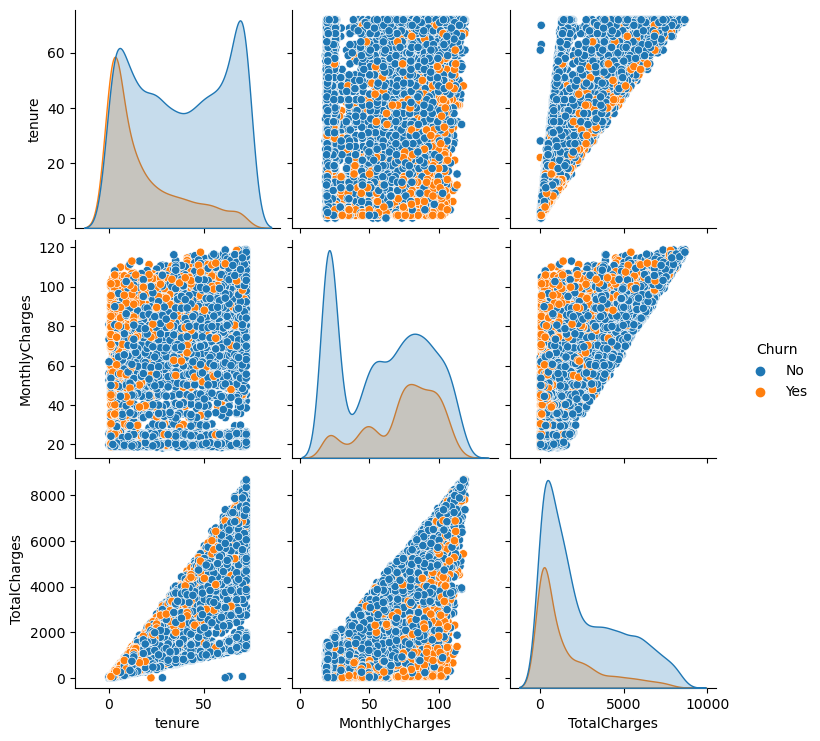

In [317]:
plt.figure(figsize=(15,2))
sns.pairplot(dataset[['tenure','MonthlyCharges','TotalCharges','Churn']], hue='Churn')
plt.show()

**From the above chart there is no significant outcome which can tell us that numerical fields are important variables for predicting the churn rate**

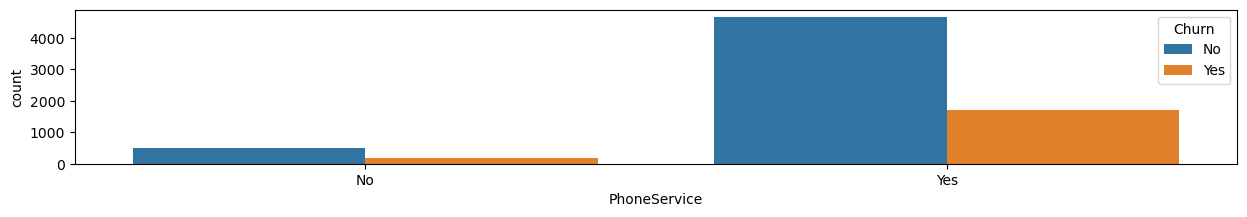

In [318]:
plt.figure(figsize=(15,2))
sns.countplot(data=dataset, x = 'PhoneService',hue='Churn')
plt.show()

**From the above chart there is no significant outcome which can tell us that PhoneService is an important variable for predicting the churn rate**

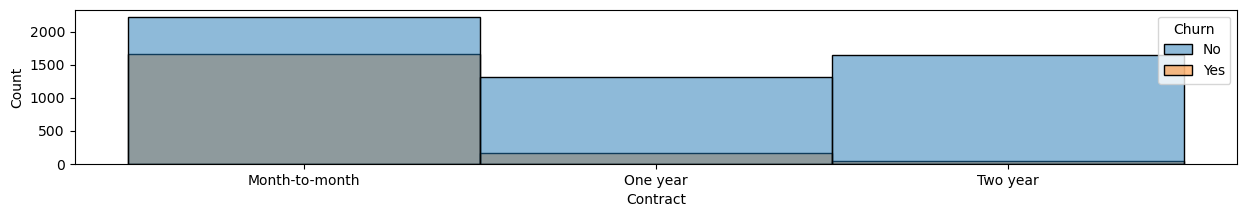

In [319]:
plt.figure(figsize=(15,2))
sns.histplot(data=dataset, x = 'Contract',hue='Churn')
plt.show()

**From the above chart we can say that customers with month to month subscription are more tends to churn and customers with two year subscription they are less tends to churn**

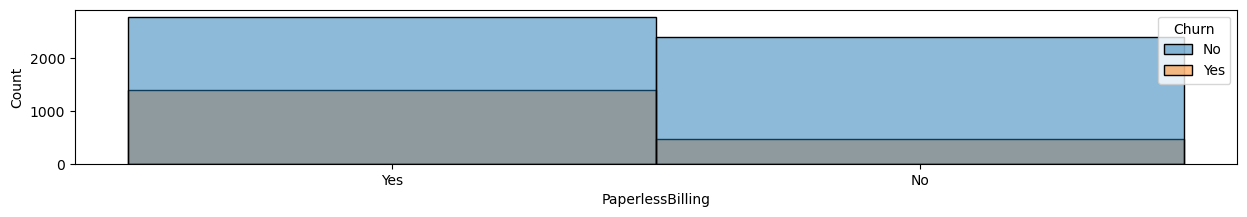

In [320]:
plt.figure(figsize=(15,2))
sns.histplot(data=dataset, x = 'PaperlessBilling',hue='Churn')
plt.show()

**From the above chart we can say that the customers with paperless billing are more prone to churn but as per my understanding that cannot be very significant variable for business point of view**

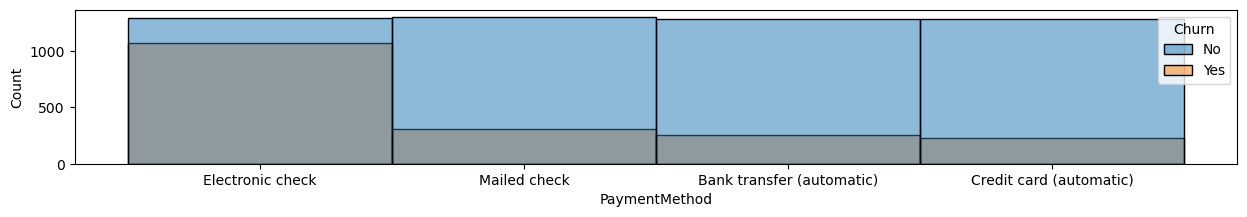

In [321]:
plt.figure(figsize=(15,2))
sns.histplot(data=dataset, x = 'PaymentMethod',hue='Churn')
plt.show()

**Customer who are paying through electronic check are more prone to churn**

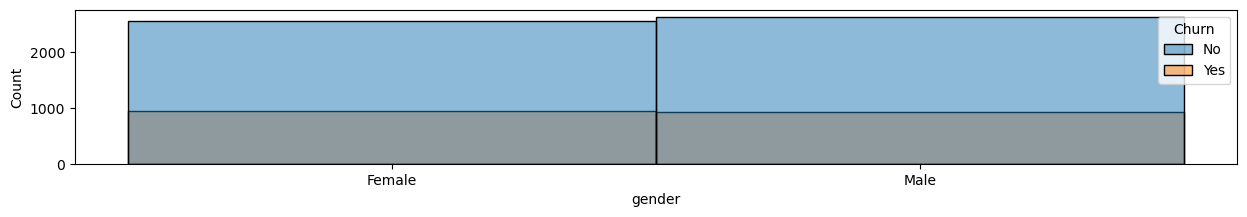

In [322]:
plt.figure(figsize=(15,2))
sns.histplot(data=dataset, x = 'gender',hue='Churn')
plt.show()

**From the above chart there is no significant outcome which can tell us that Gender is an important variable for predicting the churn rate**

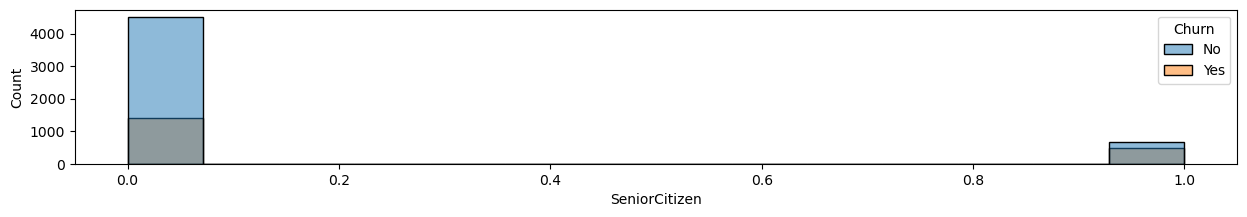

In [323]:
plt.figure(figsize=(15,2))
sns.histplot(data=dataset, x = 'SeniorCitizen',hue='Churn')
plt.show()

**Senior Citizens are more prone to churn**

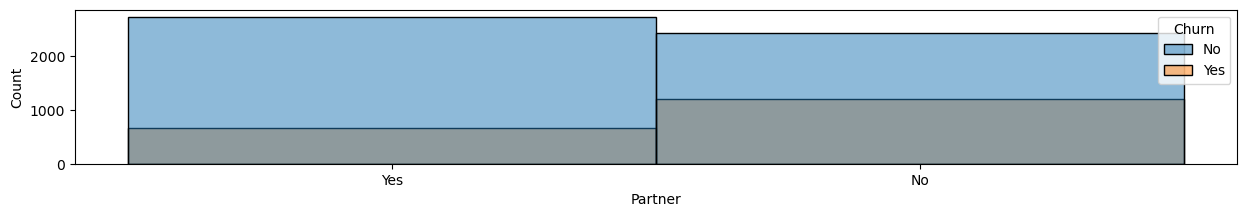

In [324]:
plt.figure(figsize=(15,2))
sns.histplot(data=dataset, x = 'Partner',hue='Churn')
plt.show()

**Customers with partners are less prone to churn**

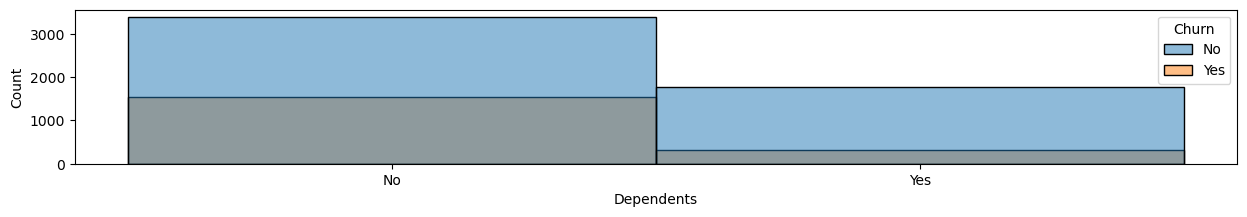

In [325]:
plt.figure(figsize=(15,2))
sns.histplot(data=dataset, x = 'Dependents',hue='Churn')
plt.show()

**Customers with dependents are less prone to churn**

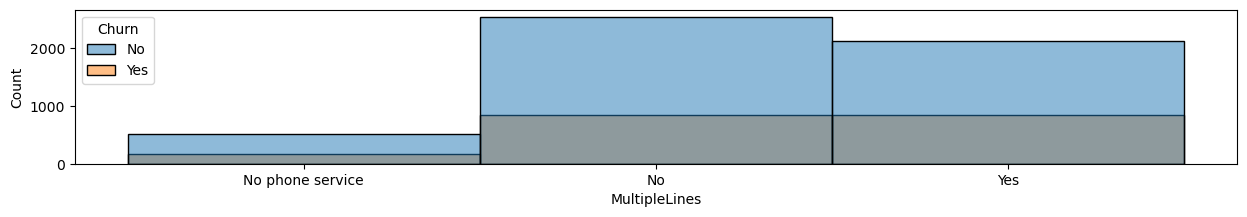

In [326]:
plt.figure(figsize=(15,2))
sns.histplot(data=dataset, x = 'MultipleLines',hue='Churn')
plt.show()

**From the above chart there is no significant outcome which can tell us that Multiple lines is an important variable for predicting the churn rate**

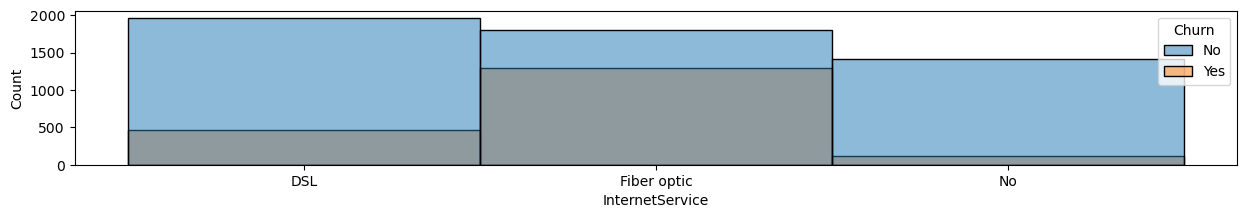

In [327]:
plt.figure(figsize=(15,2))
sns.histplot(data=dataset, x = 'InternetService',hue='Churn')
plt.show()

**Customers with fiber optic connections are more prone to churn**

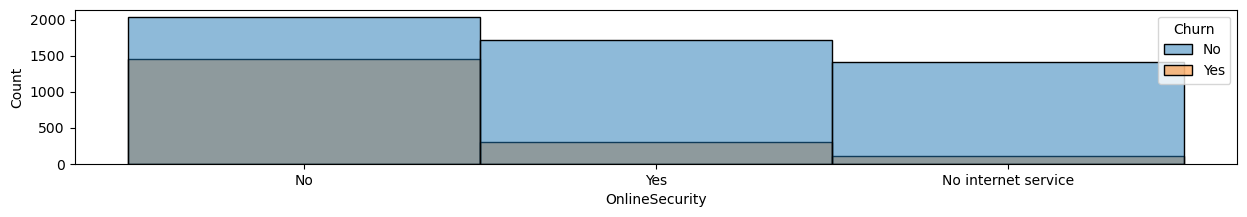

In [328]:
plt.figure(figsize=(15,2))
sns.histplot(data=dataset, x = 'OnlineSecurity',hue='Churn')
plt.show()

**Customers with No as onlinesecurity are more prone to churn**

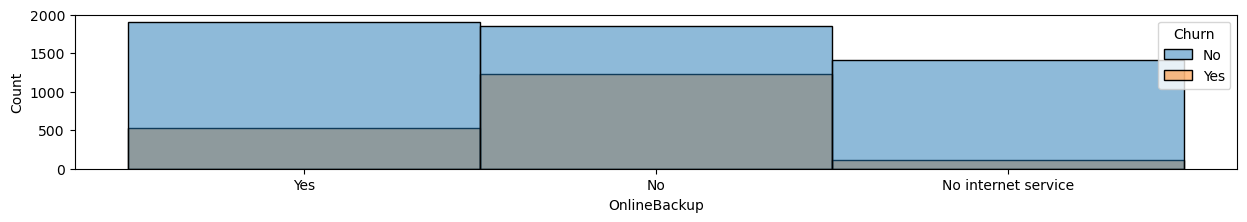

In [329]:
plt.figure(figsize=(15,2))
sns.histplot(data=dataset, x = 'OnlineBackup',hue='Churn')
plt.show()

**Customer with no online backup are more prone to churn**

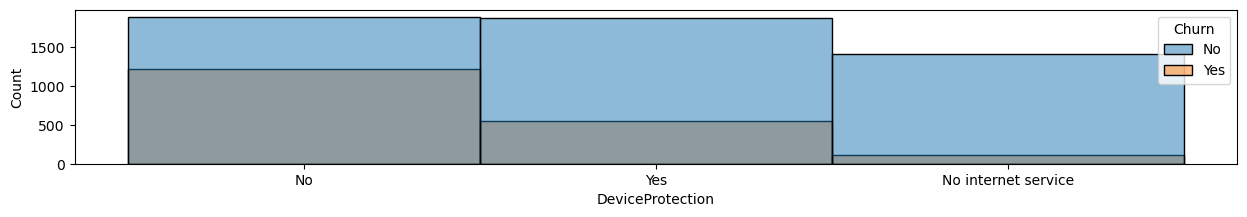

In [330]:
plt.figure(figsize=(15,2))
sns.histplot(data=dataset, x = 'DeviceProtection',hue='Churn')
plt.show()

**Customers with No device protection are more prone to churn**

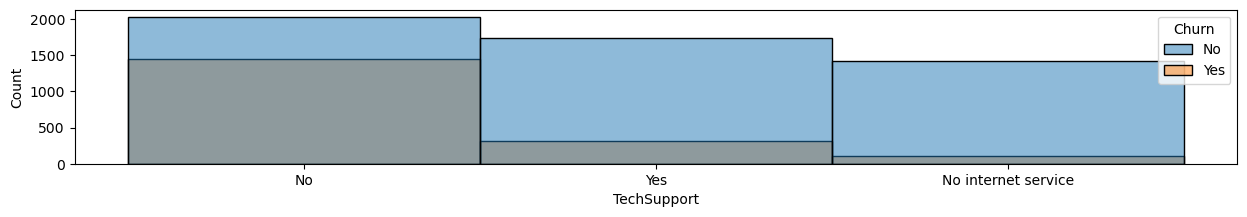

In [331]:
plt.figure(figsize=(15,2))
sns.histplot(data=dataset, x = 'TechSupport',hue='Churn')
plt.show()

**Customers with No tech support are more prone to churn**

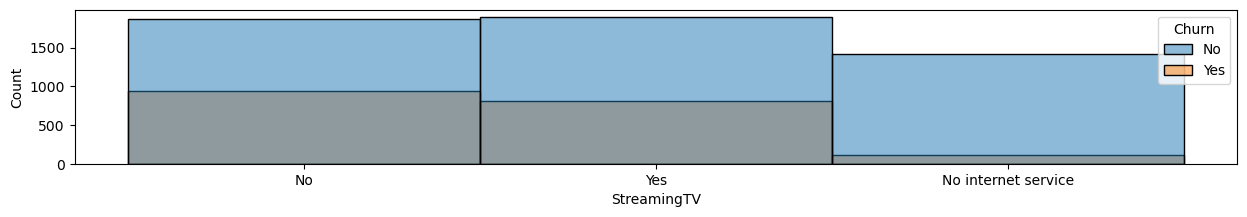

In [332]:
plt.figure(figsize=(15,2))
sns.histplot(data=dataset, x = 'StreamingTV',hue='Churn')
plt.show()

**Streaming TV is not looking very important variable**

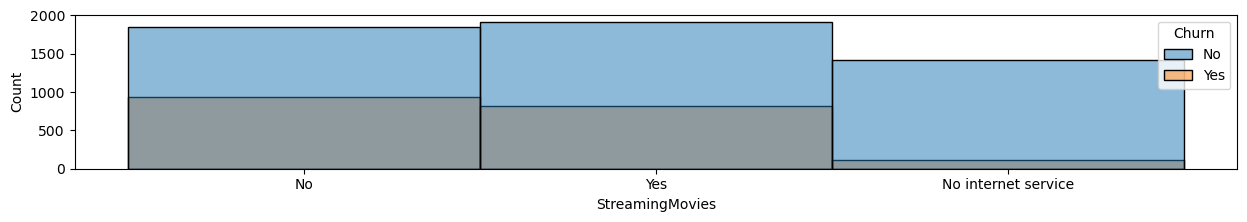

In [333]:
plt.figure(figsize=(15,2))
sns.histplot(data=dataset, x = 'StreamingMovies',hue='Churn')
plt.show()

**Streaming movies is not looking very important variable**

<a id="null"></a>
# 2.3. Missing Value Treatment

In [334]:
#Checking the count of the missing values percentage, there are very few missing values there in the dataset
dataset.isnull().sum()/len(dataset)*100

customerID          0.0
tenure              0.0
PhoneService        0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Churn               0.0
dtype: float64

**There are no missing values in the dataset, hence we are not going to do the missing value imputation in the dataset**

In [335]:
dataset.columns

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Churn'],
      dtype='object')

In [336]:
dataset

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,...,No,No phone service,DSL,No,Yes,No,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.50,Male,0,...,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,...,No,No,DSL,Yes,Yes,No,No,No,No,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,...,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,...,No,No,Fiber optic,No,No,No,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,Yes,One year,Yes,Mailed check,84.80,1990.50,Male,0,...,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,No
7039,2234-XADUH,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,Female,0,...,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,No
7040,4801-JZAZL,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,Female,0,...,Yes,No phone service,DSL,Yes,No,No,No,No,No,No
7041,8361-LTMKD,4,Yes,Month-to-month,Yes,Mailed check,74.40,306.60,Male,1,...,No,Yes,Fiber optic,No,No,No,No,No,No,Yes


<a id="enc"></a>
# 2.4. Encoding and Feature Scaling

In [338]:
# Separating the numerical and categorical columns
from sklearn.preprocessing import StandardScaler
def data_type(dataset):
    """
    Function to identify the numerical and categorical data columns
    :param dataset: Dataframe
    :return: list of numerical and categorical columns
    """
    numerical = []
    categorical = []
    for i in dataset.columns:
        if dataset[i].dtype == 'int64' or dataset[i].dtype == 'float64':
            numerical.append(i)
        else:
            categorical.append(i)
    return numerical, categorical


numerical, categorical = data_type(dataset)

# Identifying the binary columns and ignoring them from scaling
def binary_columns(df):
    """
    Generates a list of binary columns in a dataframe.
    """
    binary_cols = []
    for col in df.select_dtypes(include=['int', 'float']).columns:
        unique_values = df[col].unique()
        if np.in1d(unique_values, [0, 1]).all():
            binary_cols.append(col)
    return binary_cols

binary_cols = binary_columns(dataset)

# Remove the binary columns from the numerical columns
numerical = [i for i in numerical if i not in binary_cols]

def encoding(dataset, categorical):
    """
    Function to automate the process of encoding the categorical data
    :param dataset: Dataframe
    :param categorical: List of categorical columns
    :return: Dataframe
    """
    for i in categorical:
        dataset[i] = dataset[i].astype('category')
        dataset[i] = dataset[i].cat.codes
    return dataset

dataset = encoding(dataset, categorical)

def feature_scaling(dataset, numerical):
    """
    Function to automate the process of feature scaling the numerical data
    :param dataset: Dataframe
    :param numerical: List of numerical columns
    :return: Dataframe
    """
    sc_x = StandardScaler()
    dataset[numerical] = sc_x.fit_transform(dataset[numerical])
    return dataset

dataset = feature_scaling(dataset, numerical)

In [339]:
dataset

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
0,5375,-1.277445,0,0,1,2,-1.160323,-0.991720,0,0,...,0,1,0,0,2,0,0,0,0,0
1,3962,0.066327,1,1,0,3,-0.259629,-0.171275,1,0,...,0,0,0,2,0,2,0,0,0,0
2,2564,-1.236724,1,0,1,3,-0.362660,-0.957176,1,0,...,0,0,0,2,2,0,0,0,0,1
3,5535,0.514251,0,1,0,0,-0.746535,-0.192782,1,0,...,0,1,0,2,0,2,2,0,0,0
4,6511,-1.236724,1,0,1,2,0.197365,-0.937984,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,-0.340876,1,1,1,3,0.665992,-0.126715,1,0,...,1,2,0,2,0,2,2,2,2,0
7039,1525,1.613701,1,1,1,1,1.277533,2.243495,0,0,...,1,2,1,0,2,2,0,2,2,0
7040,3367,-0.870241,0,0,1,2,-1.168632,-0.852042,0,0,...,1,1,0,2,0,0,0,0,0,0
7041,5934,-1.155283,1,0,1,3,0.320338,-0.869623,1,1,...,0,2,1,0,0,0,0,0,0,1


<a id="lr"></a>
# 3. What is Naive Bayes

Naive Bayes is one of the very simple and fastest Machine Learning models used for Classification. In this model machine will try to find the priors and likelihoods and based on that it generates the inbuild table which will later help to find the probabilty of the new data point. This algorithm is based on the Bayes Theorem of conditional probability. 

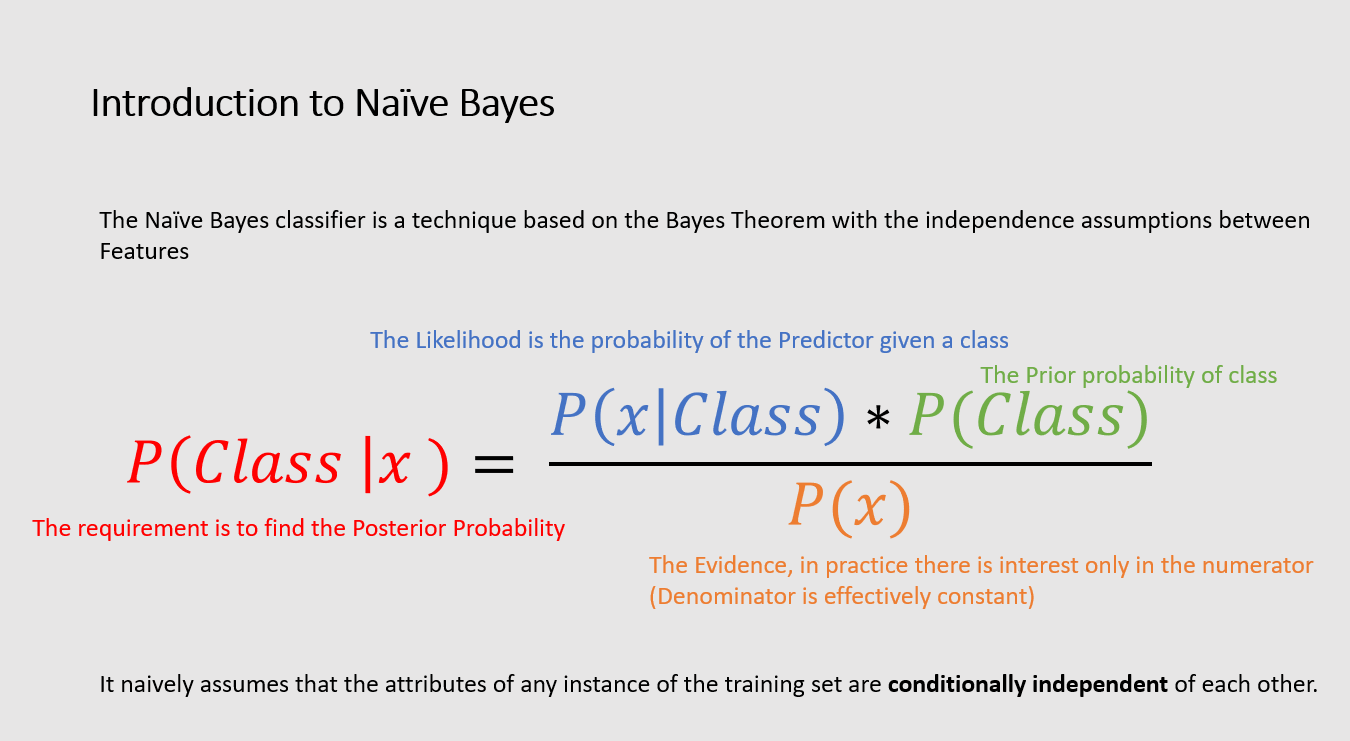

<a id="gi"></a>
# 3.1. Understanding Naive Bayes with an Example

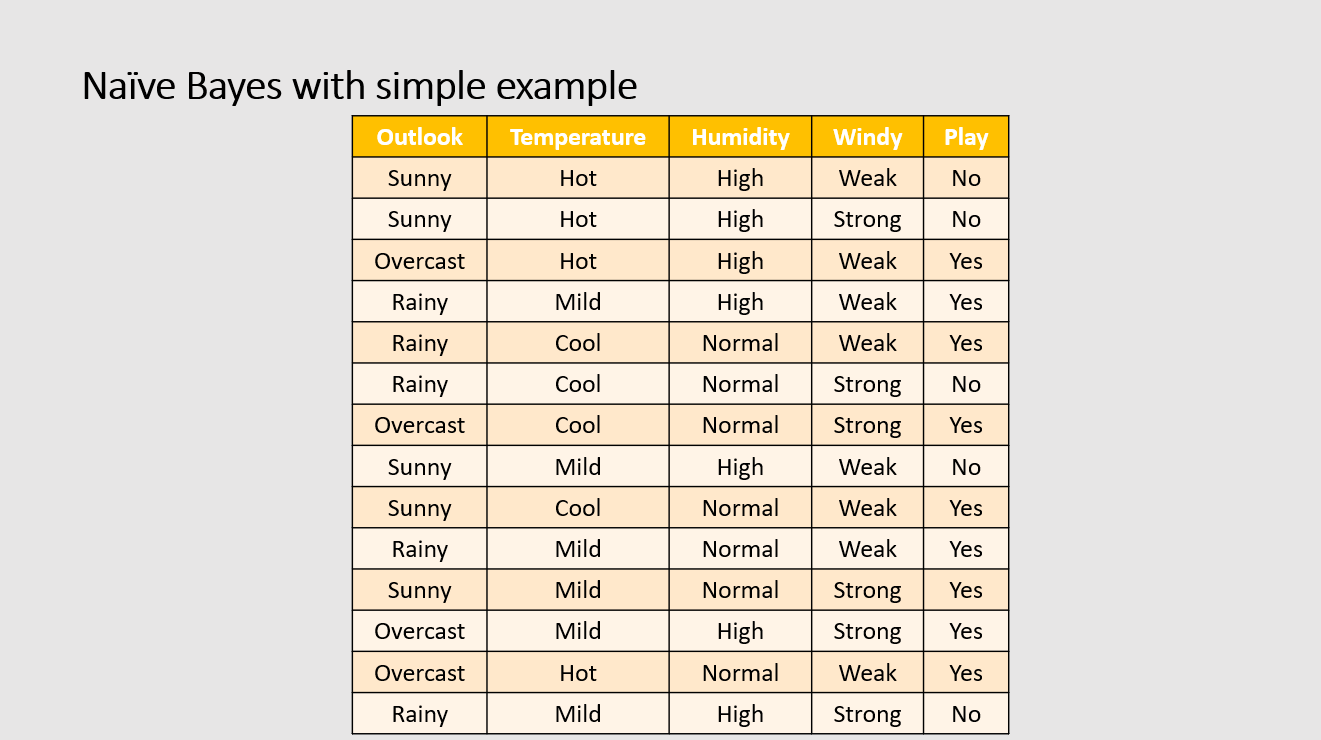

<a id="mf"></a>
# 3.2. Understanding Likelihoods and Priors

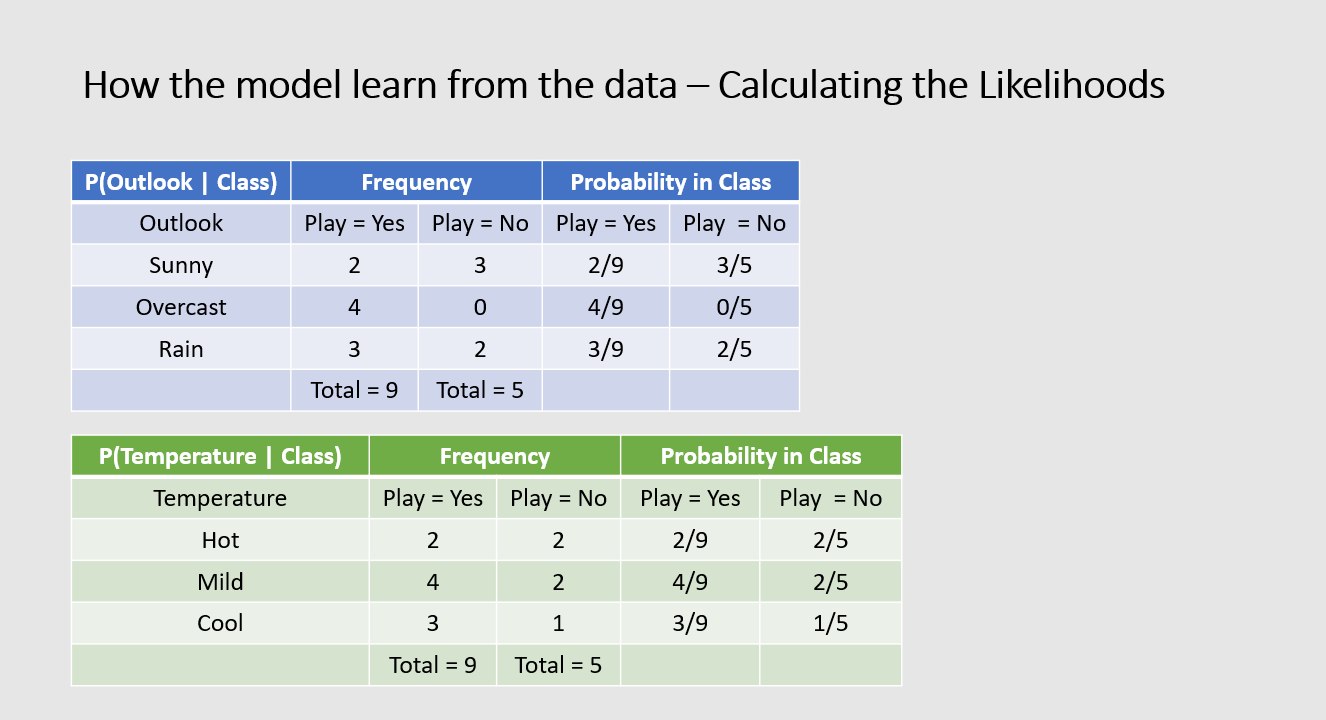

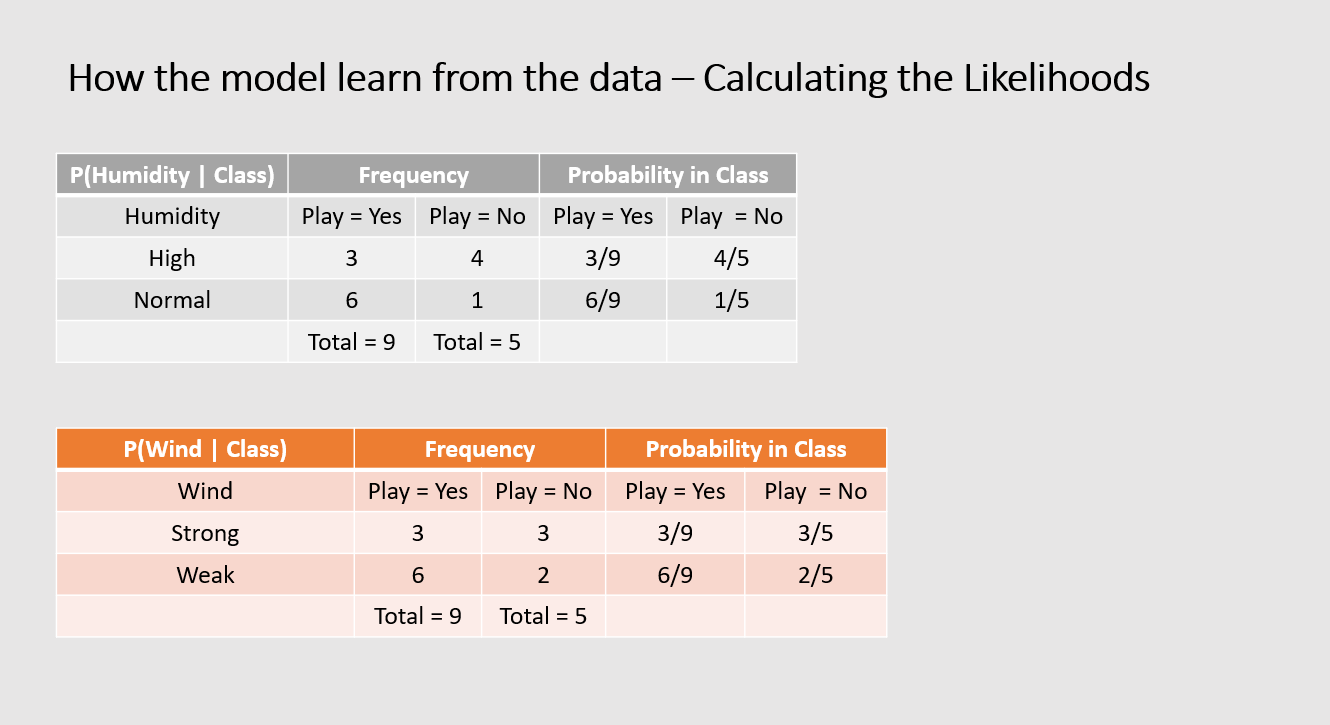

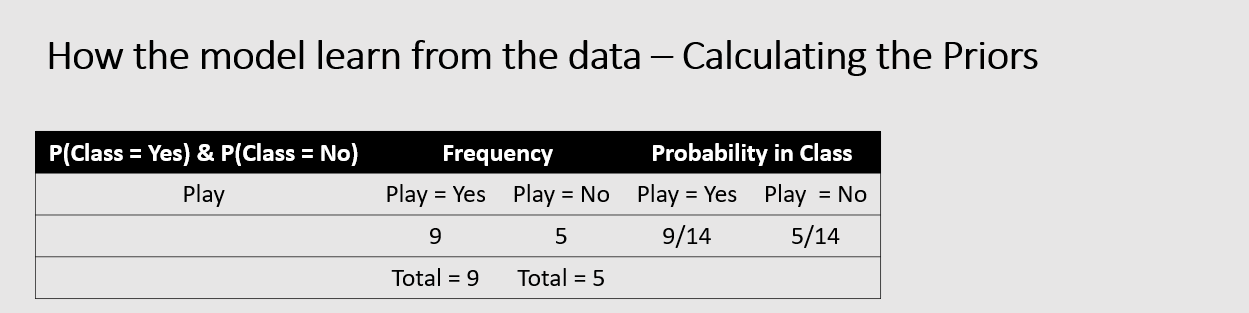

<a id="sf"></a>
# 3.3. How to Calculate the Probability of new data point

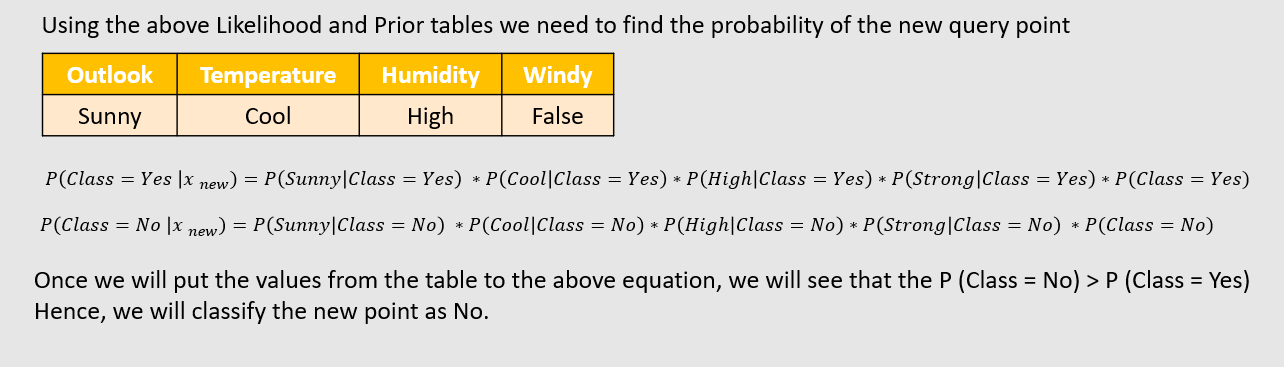

<a id="sf"></a>
# 3.4. Laplace Smoothing and its benefits

If we encounter the feature value which is not present in the dataset the probability of the same will be not defined and to take care of the same we add the laplace smoothing value i.e. also known as **alpha**, we normally to prefer the value to be 1. This will take care of the probabilty of the newly encountered value.

<a id="sd"></a>
# 4. Splitting the data into Train and Test

In [340]:
#Splitting all the independent variables in one array
x = dataset.iloc[:,1:20].values

In [341]:
#Splitting the dependent variable in one array
y = dataset.iloc[:,-1].values

In [342]:
#Splitting the dataset into train and test based on the 70-30 ratio
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30)

<a id="model"></a>
# 5. Creating the model on training dataset

In [343]:
#Applying the naive bayes on the training dataset
from sklearn.naive_bayes import GaussianNB
nbmodel_ini = GaussianNB()
nbmodel_ini.fit(x_train,y_train)

GaussianNB()

<a id="test"></a>
# 6. Run the model on the Test Dataset

In [344]:
#Running the model on the test dataset
y_pred_ini = nbmodel_ini.predict(x_test)

<a id="acc"></a>
# 7. Check the accuracy of the model

There are various ways to check the accuracy of the classification model we are going to use all the ways to check the accuracies 

In [345]:
#Importing all the functions to for checking the accuracies
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix,plot_precision_recall_curve,plot_roc_curve, accuracy_score, log_loss

<a id="accscore"></a>
# 7.1. Accuracy Score

In [346]:
#Using accuracy score we are checking the accuracy on the testing dataset
accuracy_score(y_test,y_pred_ini)

0.7491717936583058

<a id="cm"></a>
# 7.2. Confusion Matrix

C:\Users\rahul\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


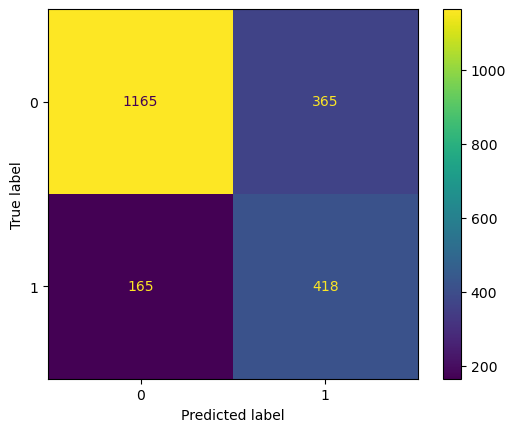

In [347]:
#Using confusion matrix we are checking the accuracy on the testing dataset
plot_confusion_matrix(nbmodel_ini,x_test,y_test)

<a id="roc"></a>
# 7.3. RO Curve

C:\Users\rahul\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


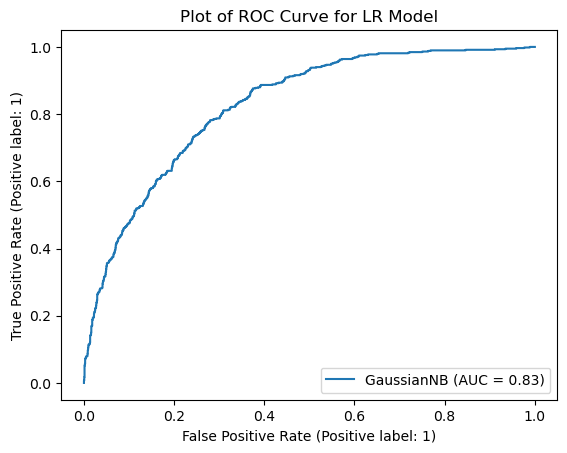

In [348]:
#Using ROC Curve we are checking the accuracy on the testing dataset
plot_roc_curve(nbmodel_ini, x_test, y_test)
plt.title("Plot of ROC Curve for LR Model")
plt.show()

<a id="f1score"></a>
# 7.4. F1 Score

In [349]:
#Using F1 Score we are checking the accuracy on the testing dataset
target_names= ["Negative(0)","Positive(1)"]
# Classification Report
print(classification_report(y_test,nbmodel_ini.predict(x_test),target_names=target_names))

              precision    recall  f1-score   support

 Negative(0)       0.88      0.76      0.81      1530
 Positive(1)       0.53      0.72      0.61       583

    accuracy                           0.75      2113
   macro avg       0.70      0.74      0.71      2113
weighted avg       0.78      0.75      0.76      2113



<a id="logloss"></a>
# 7.5. Log Loss

In [350]:
#Using Logloss we are checking the accuracy on the testing dataset
log_loss(y_test,nbmodel_ini.predict(x_test))

8.663437454976188

<a id="overunder"></a>
# 8. Comparing the Training and Testing Accuracies

In [351]:
#Storing the predicted values of training dataset in y_pred_train
y_pred_train = nbmodel_ini.predict(x_train)

In [352]:
#Checking the accuracy of training dataset 
accuracy_score(y_train,y_pred_train)

0.7549695740365111

In [353]:
#Checking the accuracy of testing dataset
accuracy_score(y_test,y_pred_ini)

0.7491717936583058

**Conclusion:** As there is very less difference between the accuracy of training and testing dataset we are good to go with the model

<a id="kfcv"></a>
# 9. Applying K-Fold Cross Validation to find the best value of Laplace Smoothing

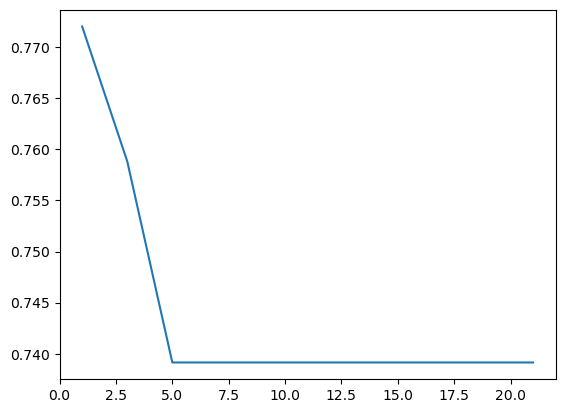

In [354]:
#Using K-fold cross validation technique we will find the best value of laplace smoothing
var_smoothing = [1,3,5,7,9,11,13,15,17,19,21]
from sklearn.model_selection import cross_val_score
cv_score = []

for v in var_smoothing:
    nbmodel = GaussianNB(var_smoothing=v)
    scores = cross_val_score(nbmodel, x_train,y_train,cv=3, scoring='accuracy')
    cv_score.append(scores.mean())
    
cv_score
plt.plot(var_smoothing, cv_score)
plt.show()
#The best value of K is coming out to be 11, we will retrain the model with the value of K as 11

In [355]:
#Applying the Naive Bayes on the training dataset
from sklearn.naive_bayes import GaussianNB
nbmodel_tuned = GaussianNB(var_smoothing=1)
nbmodel_tuned.fit(x_train,y_train)

GaussianNB(var_smoothing=1)

In [356]:
#Running the model on the test dataset
y_pred_tuned = nbmodel_tuned.predict(x_test)

In [357]:
#Using accuracy score we are checking the accuracy on the testing dataset
accuracy_score(y_test,y_pred_tuned)

0.7600567912920019

In [358]:
# create an empty dataframe to store the scores for various algorithms
from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_auc_score, f1_score
score_card = pd.DataFrame(columns=['model_name','Accuracy Score','Precision Score','Recall Score','AUC Score','f1 Score'])

# append the result table for all performance scores

def update_score_card(y_test,y_pred,model_name):

    # assign 'score_card' as global variable
    global score_card
    
    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'model_name':model_name,
                                    'Accuracy Score' : accuracy_score(y_test, y_pred),
                                    'Precision Score': precision_score(y_test, y_pred),
                                    'Recall Score': recall_score(y_test, y_pred),
                                    'AUC Score': roc_auc_score(y_test, y_pred),
                                    'f1 Score': f1_score(y_test, y_pred)}, 
                                    ignore_index = True)

In [359]:
update_score_card(y_test,y_pred_ini,'initial_model')

C:\Users\rahul\AppData\Local\Temp\ipykernel_12492\1828073584.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card = score_card.append({'model_name':model_name,


In [360]:
update_score_card(y_test,y_pred_tuned,'tuned_model')

C:\Users\rahul\AppData\Local\Temp\ipykernel_12492\1828073584.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card = score_card.append({'model_name':model_name,


In [361]:
score_card

,model_name,Accuracy Score,Precision Score,Recall Score,AUC Score,f1 Score
0,initial_model,0.749172,0.533844,0.716981,0.739210,0.612006
1,tuned_model,0.760057,0.557576,0.631218,0.720184,0.592116


**Interpretation - Overall there was a decent increase in the model accuracy after introducting the hyper parameter tuning technique and improve the value of laplace smoothing.**